### Introduction: 
Depression is a serious mental health condition that can significantly affect an individual's daily life. This notebook focuses on classifying depression levels using a dataset and machine learning techniques.


#### Dataset Attributes

- **Unnamed: 0**: An index column.
- **age**: The age of the individual.
- **gender**: Gender of the individual (likely coded numerically).
- **governante**: Possibly a region or governance-related attribute (coded numerically).
- **address**: Address type or location attribute (coded numerically).
- **edu_level**: Educational level (coded numerically).
- **fin_level**: Financial level or status (coded numerically).
- **hand**: Hands motion according to the mental (coded numerically).
- **mstatus**: Marital status (coded numerically).
- **fam_size**: Family size.
- **work_type**: Type of work or occupation (coded numerically).
- **Q3, Q5, Q10, Q13, Q16, Q17, Q21**: Responses to specific survey questions (likely binary or categorical).
- **Depression_label**: The target variable indicating the depression status (e.g., Normal, indicating no depression).


In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

### 1. Data Preprocissing:

#### Loading The Dataset

In [333]:
# Load the dataset

file_path = "dataset.csv" 

cols = ['age', 'gender', 'governante', 'address', 'edu_level', 'fin_level', 'hand', 'mstatus', 'fam_size', 'work_type', 'Q3', 'Q5', 'Q10', 'Q13', 'Q16', 'Q17', 'Q21', 'Depression_label']
data = pd.read_csv(file_path)  # , names=cols


# Display the first 10 rows of the dataset to understand its structure

data.head(10)

,Unnamed: 0,age,gender,governante,address,edu_level,fin_level,hand,mstatus,fam_size,work_type,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Depression_label
0,0,4,0,14,1,3,1,2,2,5,5,0,0,0,1,0,0,0,Normal
1,1,3,1,12,1,3,1,1,1,6,6,0,1,0,1,1,0,0,Normal
2,2,3,0,14,2,3,1,1,1,5,5,0,0,0,1,0,0,0,Normal
3,3,3,0,1,2,2,1,1,2,2,3,0,1,0,1,0,0,0,Normal
4,4,2,1,1,1,1,1,1,3,8,1,0,0,0,1,1,1,0,Normal
5,5,3,0,1,3,1,3,1,1,5,1,0,1,3,0,1,1,1,Normal
6,6,3,1,5,1,3,2,1,3,7,1,1,3,0,0,0,0,0,Normal
7,7,3,0,3,1,2,3,2,1,4,5,0,3,3,0,0,0,0,Normal
8,8,4,1,1,2,1,1,1,2,7,4,0,1,2,0,0,1,0,Normal
9,9,3,1,1,1,2,1,1,2,5,4,1,2,3,3,2,3,0,Moderate


#### Checking for missing values

In [334]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

Unnamed: 0          0
age                 0
gender              0
governante          0
address             0
edu_level           0
fin_level           0
hand                0
mstatus             0
fam_size            0
work_type           0
Q3                  0
Q5                  0
Q10                 0
Q13                 0
Q16                 0
Q17                 0
Q21                 0
Depression_label    0
dtype: int64

#### Now replace the Catigories of depression label into numerical values

In [335]:
data["Depression_label"] = data["Depression_label"].map(
    {
        "Normal": 1,
        "Mild": 2,
        "Moderate": 3,
        "Severe": 4,
    }
)

# Display the first 10 rows of the dataset to understand its structure
data.head(10)

,Unnamed: 0,age,gender,governante,address,edu_level,fin_level,hand,mstatus,fam_size,work_type,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Depression_label
0,0,4,0,14,1,3,1,2,2,5,5,0,0,0,1,0,0,0,1
1,1,3,1,12,1,3,1,1,1,6,6,0,1,0,1,1,0,0,1
2,2,3,0,14,2,3,1,1,1,5,5,0,0,0,1,0,0,0,1
3,3,3,0,1,2,2,1,1,2,2,3,0,1,0,1,0,0,0,1
4,4,2,1,1,1,1,1,1,3,8,1,0,0,0,1,1,1,0,1
5,5,3,0,1,3,1,3,1,1,5,1,0,1,3,0,1,1,1,1
6,6,3,1,5,1,3,2,1,3,7,1,1,3,0,0,0,0,0,1
7,7,3,0,3,1,2,3,2,1,4,5,0,3,3,0,0,0,0,1
8,8,4,1,1,2,1,1,1,2,7,4,0,1,2,0,0,1,0,1
9,9,3,1,1,1,2,1,1,2,5,4,1,2,3,3,2,3,0,3


#### To check if the data are biased or not, we have to take a deep look on the data.

In [336]:
label_counts = data["Depression_label"].value_counts()
# 1 for Mild, 2 for Moderate, 3 for Normal, 4 for Severe

label_counts

1    572
2     95
3     57
4      4
Name: Depression_label, dtype: int64

In [337]:
# Display the counts of each class in the target variable
for col in cols:
    print(f"Counts for {col}:")
    display(data[col].value_counts().to_frame())
    print()

Counts for age:


,age
3,342
2,288
4,79
5,14
1,4
0,1



Counts for gender:


,gender
1,419
0,309



Counts for governante:


,governante
1,229
2,165
3,77
4,62
5,41
6,39
7,29
8,21
9,18
10,10



Counts for address:


,address
1,419
2,266
3,40
4,3



Counts for edu_level:


,edu_level
1,533
2,117
3,68
4,10



Counts for fin_level:


,fin_level
1,572
2,90
3,50
4,10
5,6



Counts for hand:


,hand
1,651
2,61
3,16



Counts for mstatus:


,mstatus
1,443
2,243
3,35
4,7



Counts for fam_size:


,fam_size
7,139
6,125
5,123
8,95
4,74
3,50
9,44
10,29
2,24
11,14



Counts for work_type:


,work_type
1,313
2,182
3,90
4,76
5,39
6,28



Counts for Q3:


,Q3
0,296
1,284
2,109
3,39



Counts for Q5:


,Q5
1,314
0,243
2,123
3,48



Counts for Q10:


,Q10
0,445
1,163
2,66
3,54



Counts for Q13:


,Q13
1,336
0,213
2,113
3,66



Counts for Q16:


,Q16
1,298
0,203
2,128
3,99



Counts for Q17:


,Q17
0,361
1,218
2,82
3,67



Counts for Q21:


,Q21
0,403
1,182
3,80
2,63



Counts for Depression_label:


,Depression_label
1,572
2,95
3,57
4,4


#### Visualize the distribution of the Data

##### Depression Distribution

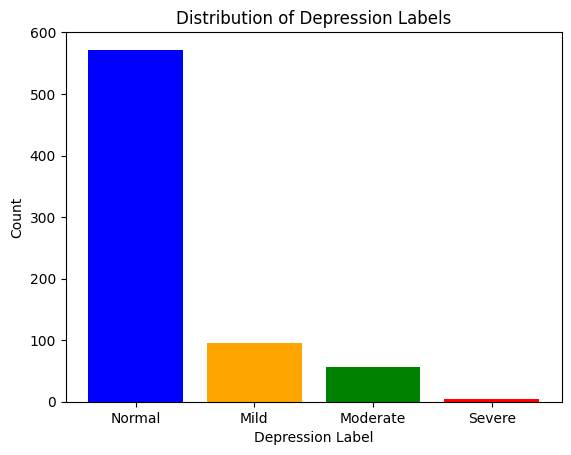

In [338]:
# Visualize the distribution of the target variable
plt.bar(
    label_counts.index, label_counts.values, color=["blue", "orange", "green", "red"]
)
plt.xticks(label_counts.index, ["Normal", "Mild", "Moderate", "Severe"])
plt.title("Distribution of Depression Labels")
plt.xlabel("Depression Label")
plt.ylabel("Count")
plt.show()

##### Features Distribution

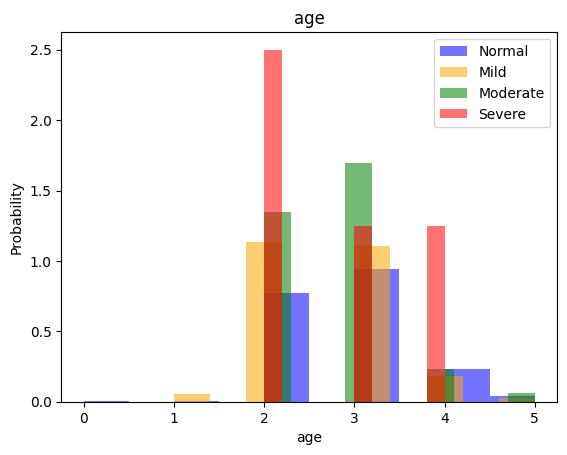

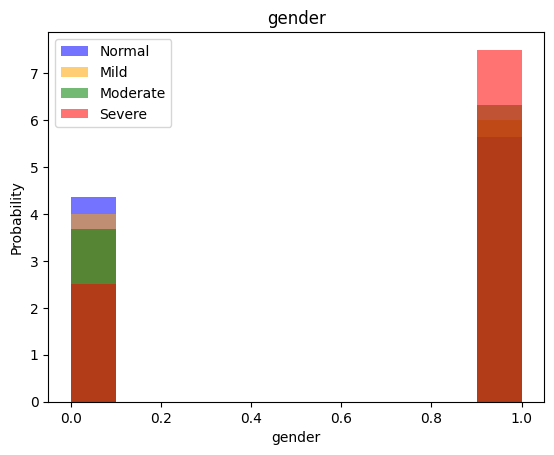

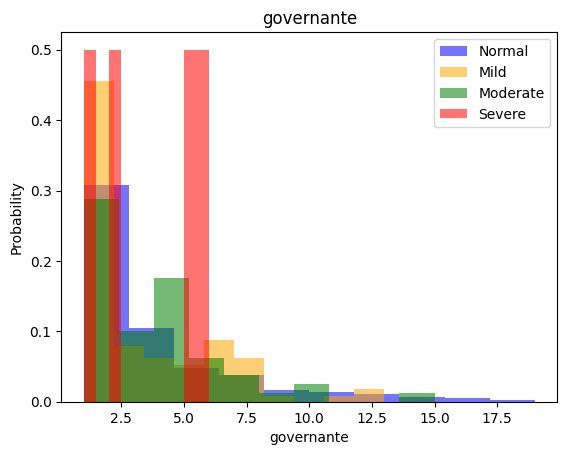

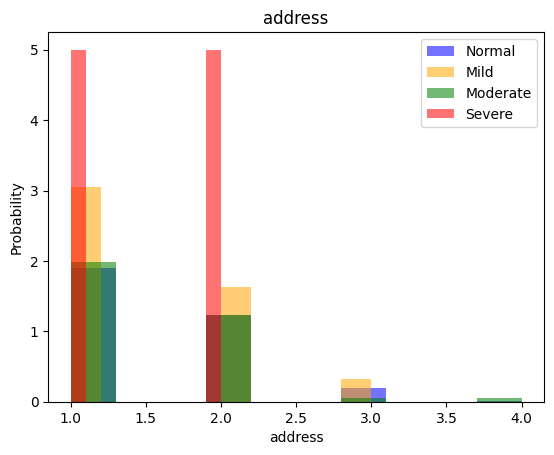

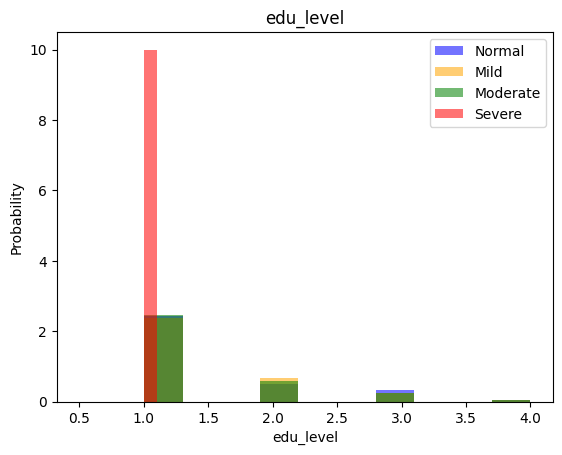

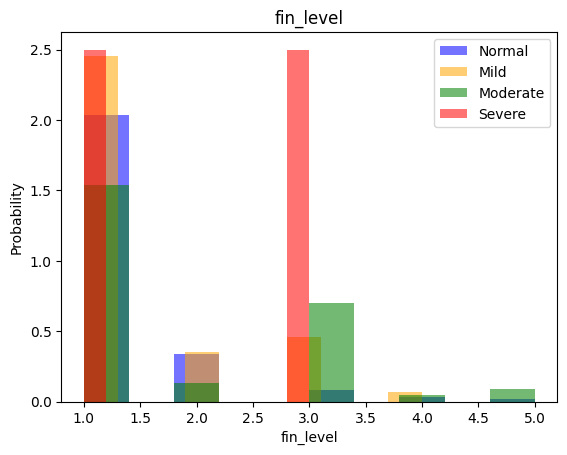

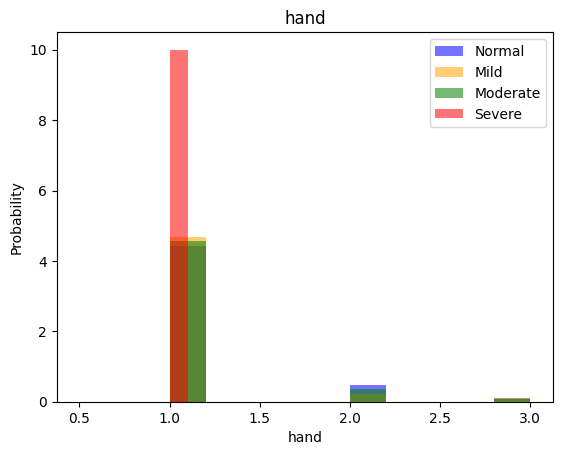

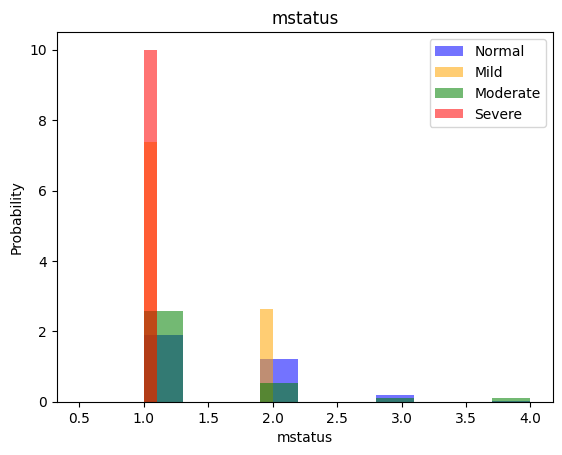

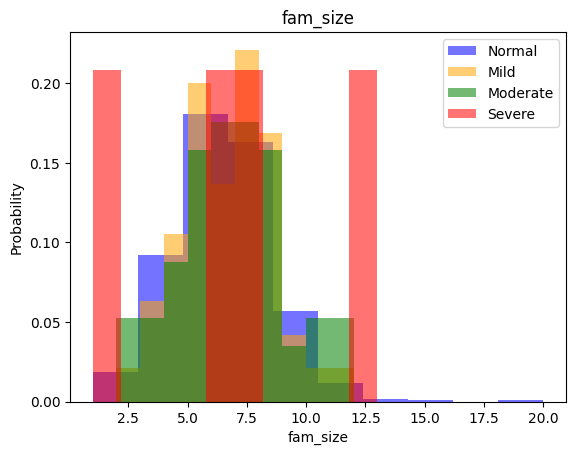

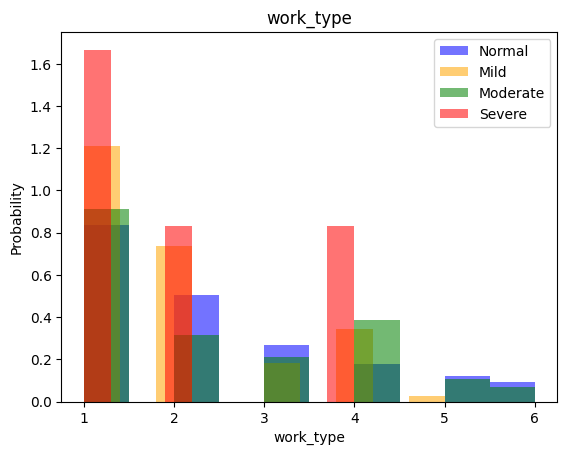

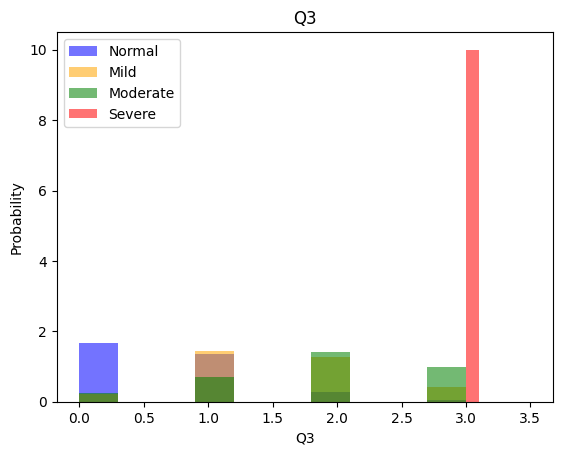

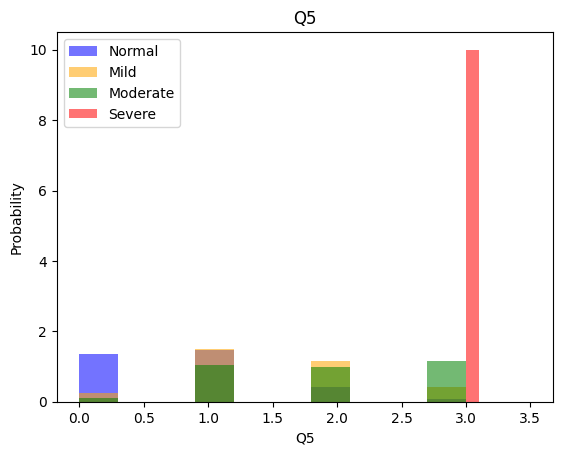

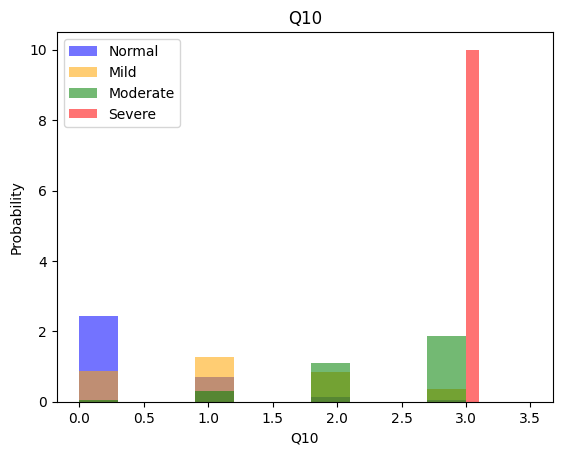

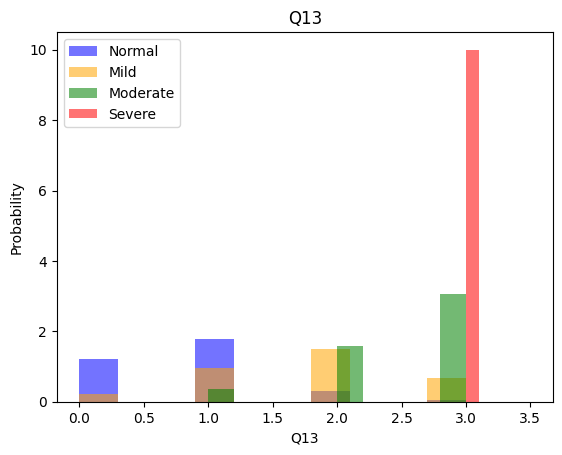

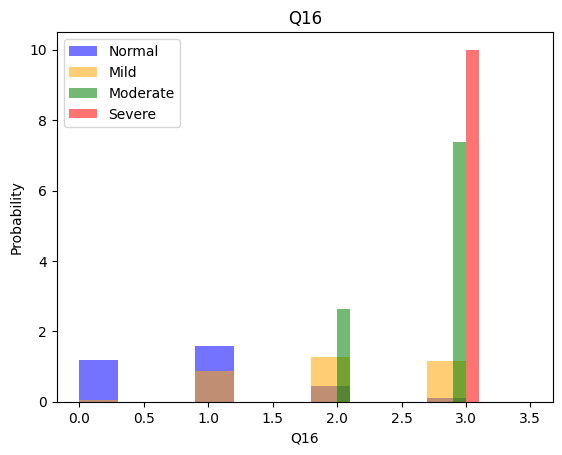

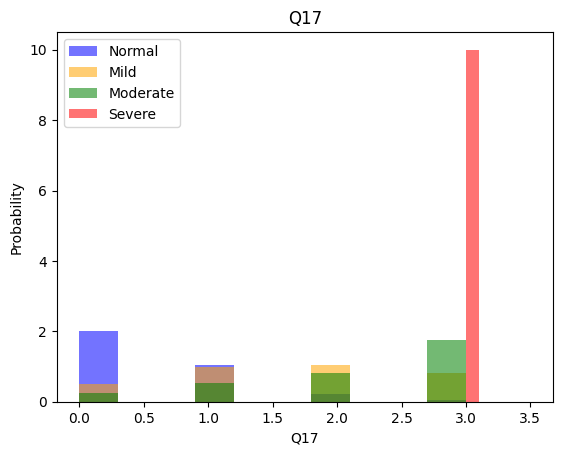

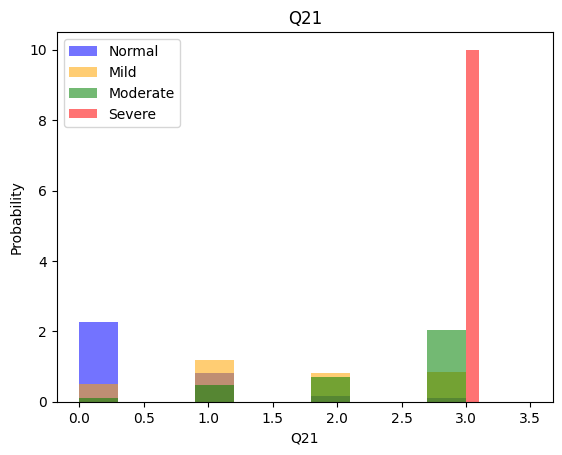

In [339]:
for label in cols[:-1]:
    plt.hist(
        data[data["Depression_label"] == 1][label],
        color="blue",
        label="Normal",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 2][label],
        color="orange",
        label="Mild",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 3][label],
        color="green",
        label="Moderate",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 4][label],
        color="red",
        label="Severe",
        alpha=0.55,
        density=True,
    )
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

##### Corelation Matrix

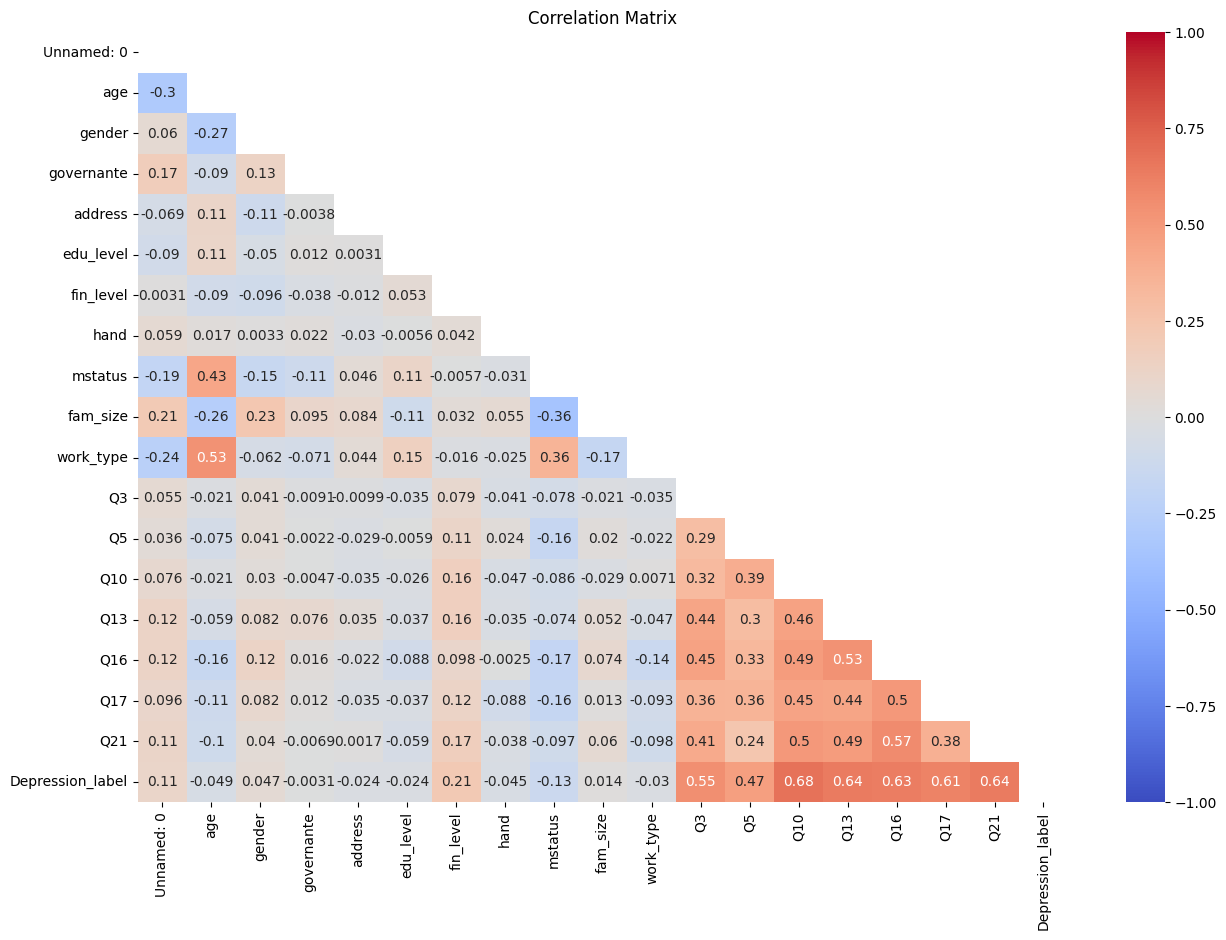

In [340]:

# Compute the correlation matrix
corr = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=np.triu(corr))
plt.title("Correlation Matrix")
plt.show()

# Example: Dropping a highly correlated feature
threshold = 0.8
# Find pairs of highly correlated features
high_corr_pairs = [
    (corr.index[i], corr.columns[j])
    for i in range(corr.shape[0])
    for j in range(i + 1, corr.shape[1])
    if abs(corr.iloc[i, j]) > threshold
]

# Drop one feature from each pair
features_to_drop = set()
for pair in high_corr_pairs:
    feature1, feature2 = pair
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        if abs(corr[feature1]["Depression_label"]) > abs(
            corr[feature2]["Depression_label"]
        ):
            features_to_drop.add(feature2)
        else:
            features_to_drop.add(feature1)

# Drop the selected features from the dataset
data_reduced = data.drop(columns=list(features_to_drop))

#### Outliers Analysis

##### Visualize the Outliers

------------> Outlier Analysis of All Features <------------



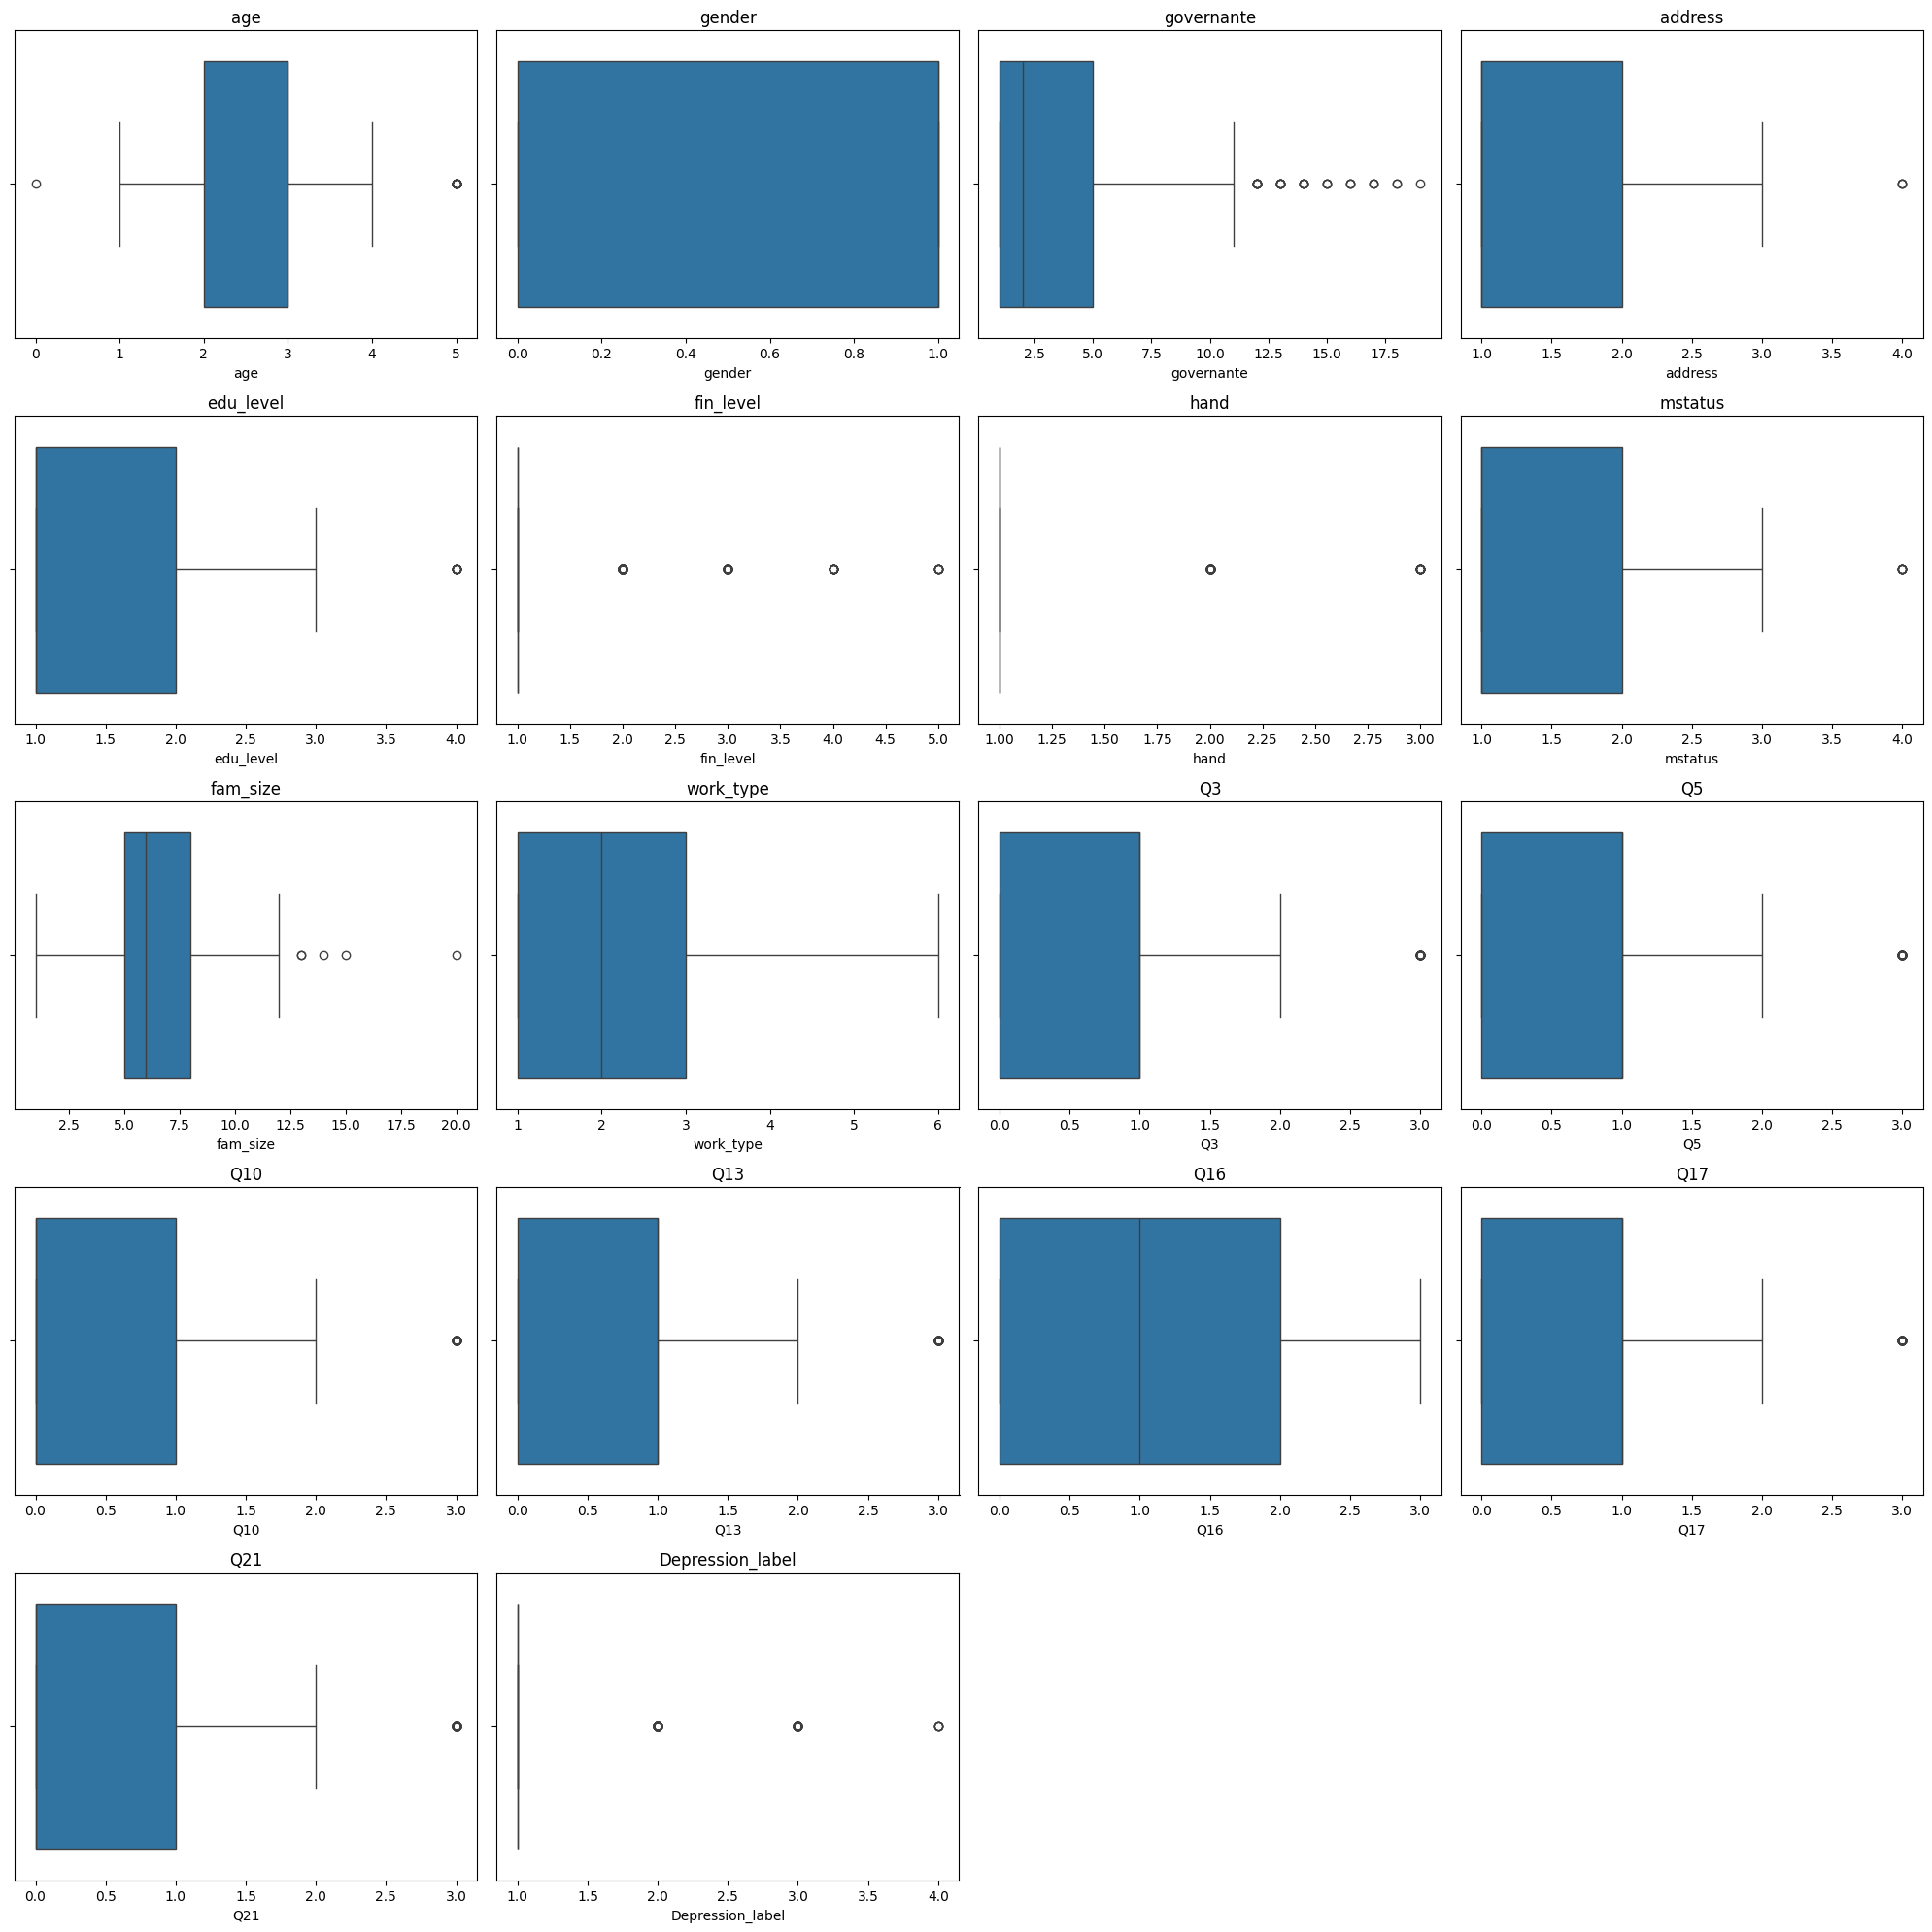

In [341]:

print("------------> Outlier Analysis of All Features <------------")
print()


# Create subplots
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = ax.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(cols):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(feature)

# Remove any unused subplots (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

##### After determining the outliers, We have to remove the outliers

In [342]:
# Define a function to remove outliers
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the dataset
cleaned_data = remove_outliers(data, cols)

# Display the cleaned dataset
cleaned_data.head()

,Unnamed: 0,age,gender,governante,address,edu_level,fin_level,hand,mstatus,fam_size,work_type,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Depression_label
3,3,3,0,1,2,2,1,1,2,2,3,0,1,0,1,0,0,0,1
4,4,2,1,1,1,1,1,1,3,8,1,0,0,0,1,1,1,0,1
8,8,4,1,1,2,1,1,1,2,7,4,0,1,2,0,0,1,0,1
10,10,3,0,1,2,1,1,1,2,4,2,1,0,0,1,1,0,1,1
11,11,4,0,1,1,3,1,1,2,6,2,1,1,0,1,0,1,0,1


##### Visualizing the Features after removing the outliers 

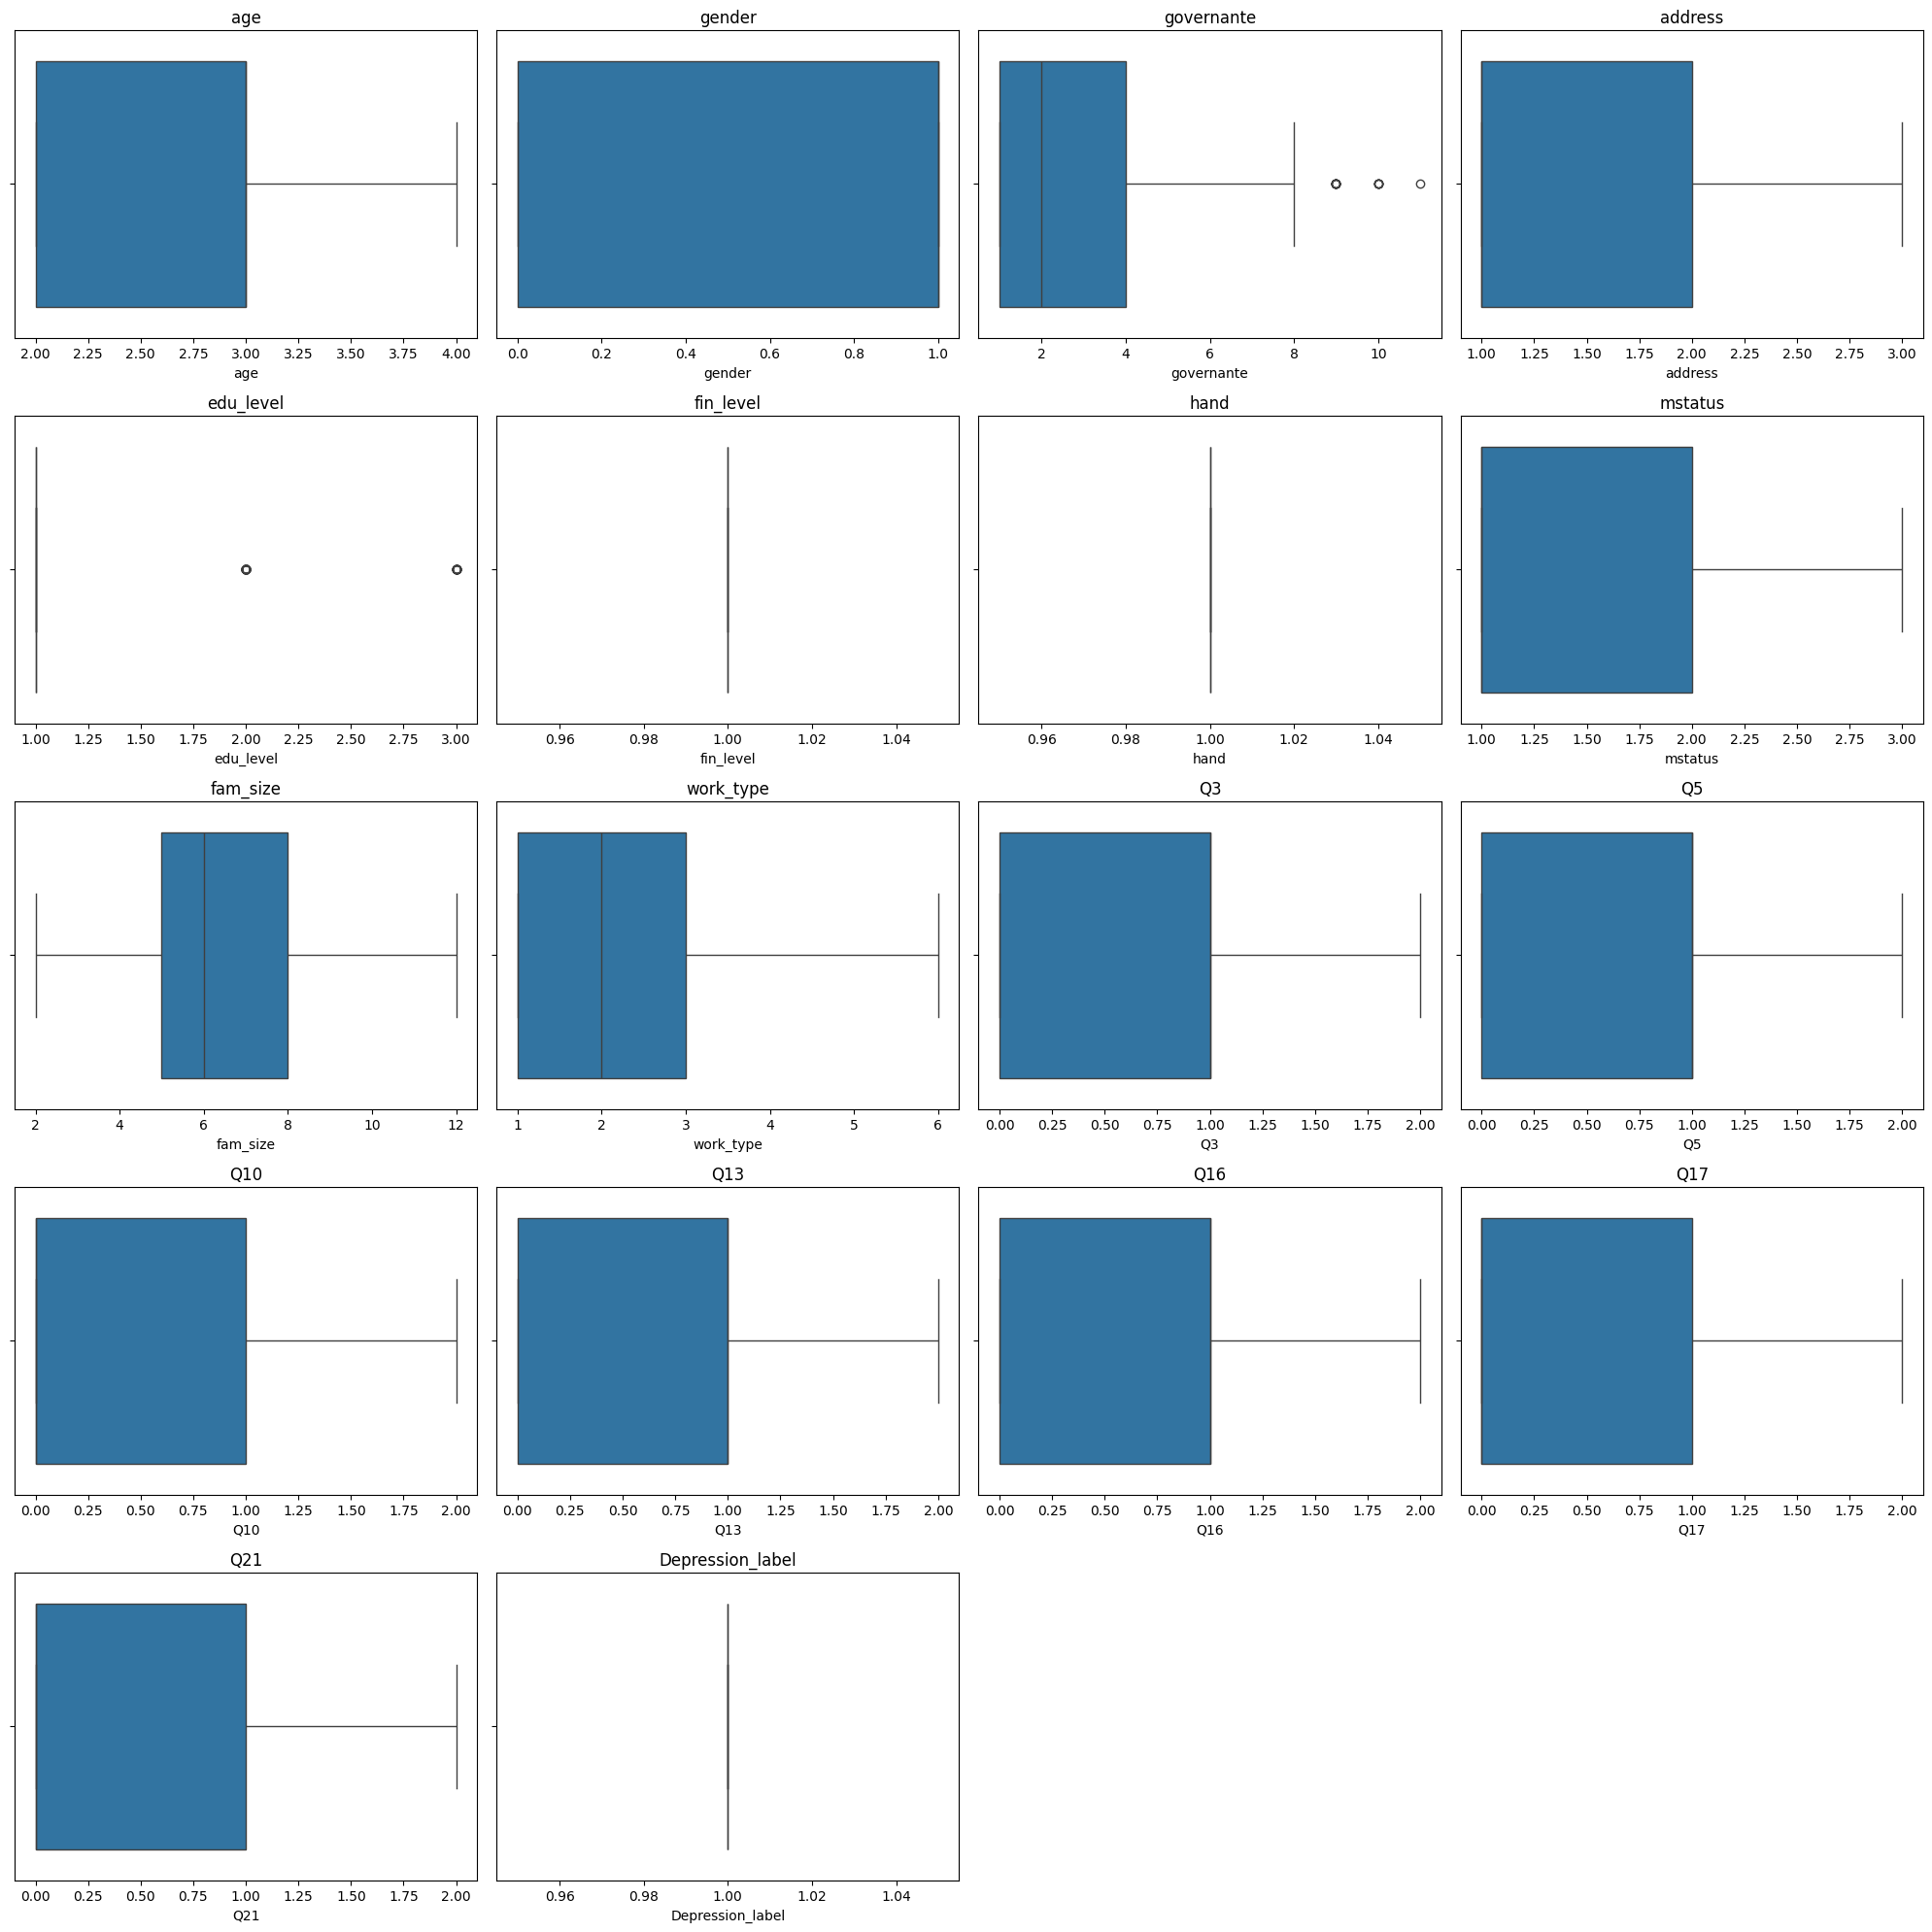

In [343]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = ax.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(cols):
    sns.boxplot(x=cleaned_data[feature], ax=axes[i])
    axes[i].set_title(feature)

# Remove any unused subplots (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Visualizing the correlation coefficient between Depression Label and the other variables.

C:\Users\Palestine\AppData\Local\Temp\ipykernel_24424\2194984229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cr, y=cr.index, palette="bright")


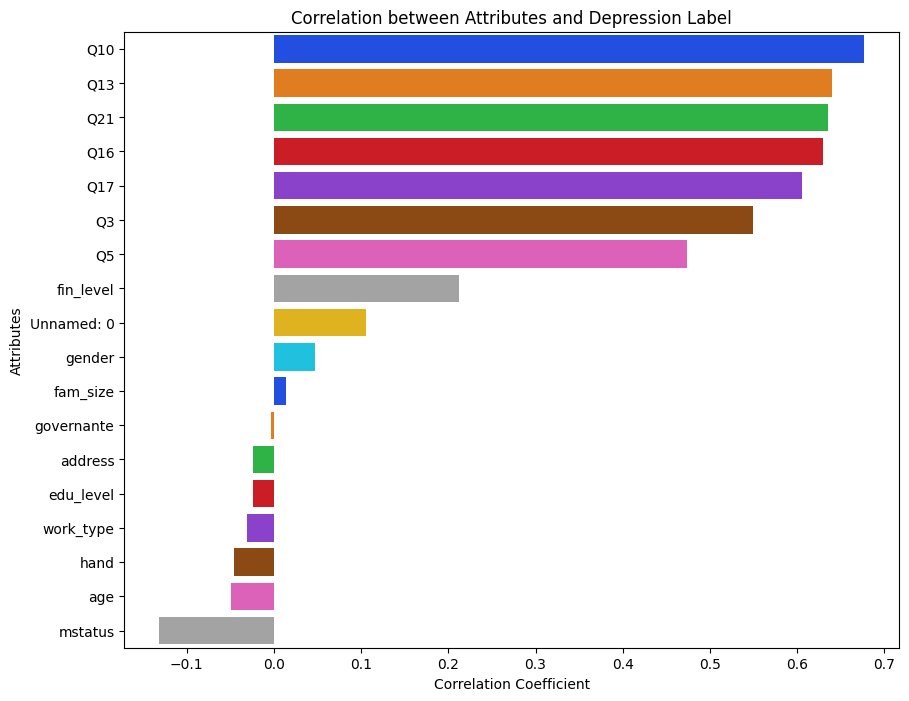

In [344]:
# Extract the correlation coefficients between 'Depression_label' and all other variables
corr_target = corr["Depression_label"]

# Sort the correlation coefficients in descending order, excluding the target itself
cr = corr_target.sort_values(ascending=False)[1:]

# Plot the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=cr, y=cr.index, palette="bright")
plt.title("Correlation between Attributes and Depression Label")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attributes")
plt.show()

### 2. Data Standardization

#### Splitting the Data into train, validate, and test sets. 

In [345]:
train, valid, test = np.split(
    data.sample(frac=1), [int(0.7 * len(data)), int(0.85 * len(data))]
)

#### Handling Imbalanced Data.
The Data were scaled using StandardScaler. Then optionally resampled according to the previous numeric visualization on the dataset.

In [346]:
def scale_dataset(dataframe, oversample=False):
    features = dataframe[dataframe.columns[:-1]].values
    target = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    if oversample:
        ros = RandomOverSampler()
        features, target = ros.fit_resample(features, target)

    data = np.hstack((features, np.reshape(target, (-1, 1))))

    return data, features, target

In [347]:
train_data, train_features, train_target = scale_dataset(train, oversample=True)
valid_data, valid_features, valid_target = scale_dataset(valid)
test_data, test_features, test_target = scale_dataset(test)

print(f"The length of the training set is {len(train_data)}")
print(f"The length of the validation set is {len(valid_data)}")
print(f"The length of the test set is {len(test_data)}")

print(f"The length of the training set is {len(train_target)}")
print(f"The length of the validation set is {len(valid_target)}")
print(f"The length of the test set is {len(test_target)}")

The length of the training set is 1596
The length of the validation set is 109
The length of the test set is 110
The length of the training set is 1596
The length of the validation set is 109
The length of the test set is 110


### Model Building and Evaluation

#### 1. SVM

In [348]:

svm_model = SVC(kernel="linear", random_state=0)
svm_model = svm_model.fit(train_features, train_target)
svm_importances = permutation_importance(
    svm_model, test_features, test_target, n_repeats=10, random_state=42
)


y_pred_svm = svm_model.predict(test_features)
print(classification_report(test_target, y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        88
           2       0.91      0.91      0.91        11
           3       0.75      1.00      0.86         9
           4       0.00      0.00      0.00         2

    accuracy                           0.96       110
   macro avg       0.66      0.72      0.69       110
weighted avg       0.95      0.96      0.96       110



c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Naive Bayes

In [349]:

nb_model = GaussianNB()

nb_model = nb_model.fit(train_features, train_target)
nb_importances = permutation_importance(

    nb_model, test_features, test_target, n_repeats=10, random_state=42
)


y_pred_nb = nb_model.predict(test_features)

print(classification_report(test_target, y_pred_nb))

              precision    recall  f1-score   support

           1       0.99      0.89      0.93        88
           2       0.45      0.82      0.58        11
           3       0.73      0.89      0.80         9
           4       0.00      0.00      0.00         2

    accuracy                           0.86       110
   macro avg       0.54      0.65      0.58       110
weighted avg       0.89      0.86      0.87       110



c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Best ANN

In [350]:

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
nn_model = nn_model.fit(train_features, train_target)
ann_importances = permutation_importance(
    nn_model, test_features, test_target, n_repeats=10, random_state=42
)


y_pred_nn = nn_model.predict(test_features)

print(classification_report(test_target, y_pred_nn))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98        88
           2       0.64      0.64      0.64        11
           3       0.56      0.56      0.56         9
           4       0.00      0.00      0.00         2

    accuracy                           0.90       110
   macro avg       0.54      0.55      0.54       110
weighted avg       0.89      0.90      0.90       110



### Calculating Metrics

#### Confusion Matrices

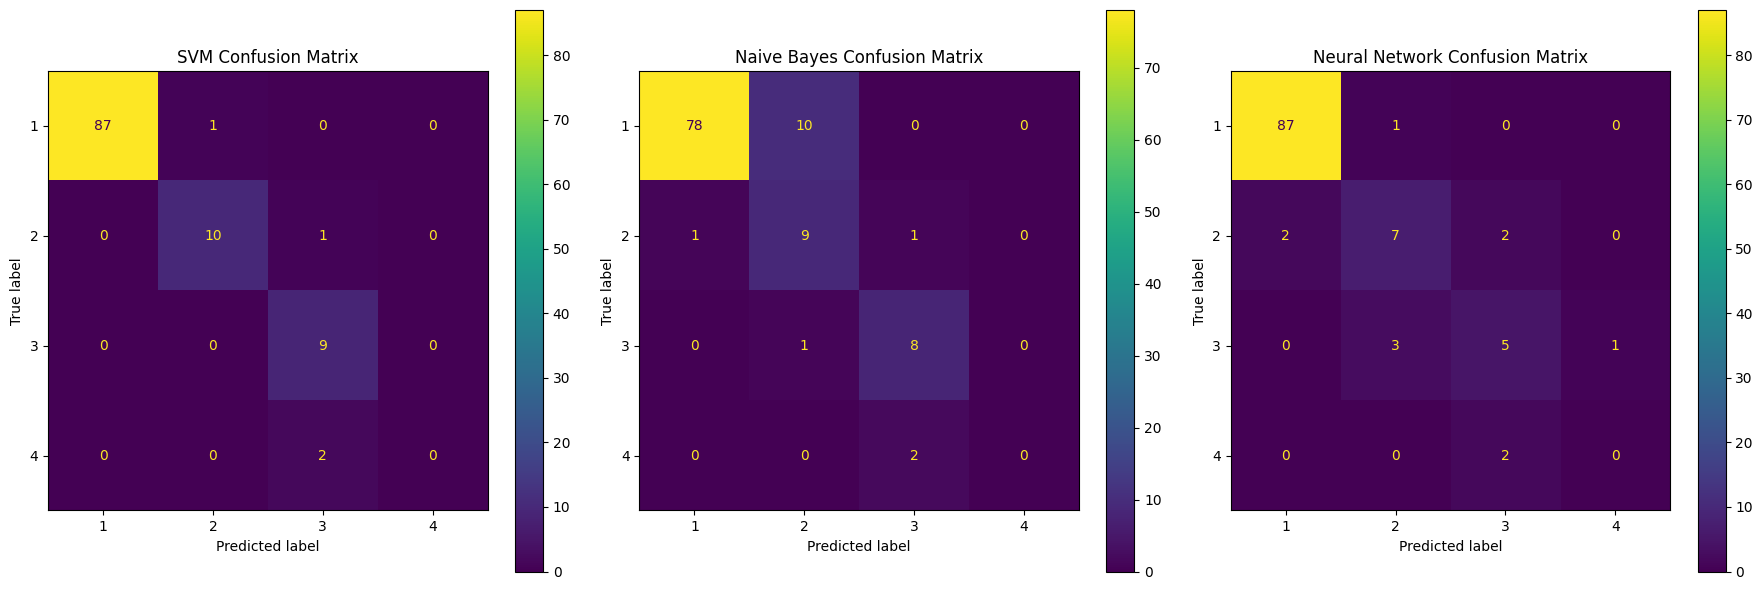

In [351]:
# Encode categorical labels

label_encoder = LabelEncoder()

data["Depression_label"] = label_encoder.fit_transform(data["Depression_label"])


# Features and target

feature = data.drop(["Depression_label"], axis=1)

target = data["Depression_label"]


# Confusion Matrices

conf_matrix_svm = confusion_matrix(test_target, y_pred_svm)

conf_matrix_nb = confusion_matrix(test_target, y_pred_nb)

conf_matrix_nn = confusion_matrix(test_target, y_pred_nn)


# Get unique classes

unique_classes = np.unique(test_target)


# Plot Confusion Matrices

fig, ax = plt.subplots(1, 3, figsize=(18, 6))


ConfusionMatrixDisplay(conf_matrix_svm, display_labels=unique_classes).plot(ax=ax[0])

ax[0].set_title("SVM Confusion Matrix")


ConfusionMatrixDisplay(conf_matrix_nb, display_labels=unique_classes).plot(ax=ax[1])

ax[1].set_title("Naive Bayes Confusion Matrix")


ConfusionMatrixDisplay(conf_matrix_nn, display_labels=unique_classes).plot(ax=ax[2])

ax[2].set_title("Neural Network Confusion Matrix")


plt.tight_layout()

plt.show()

#### Permutation Importance

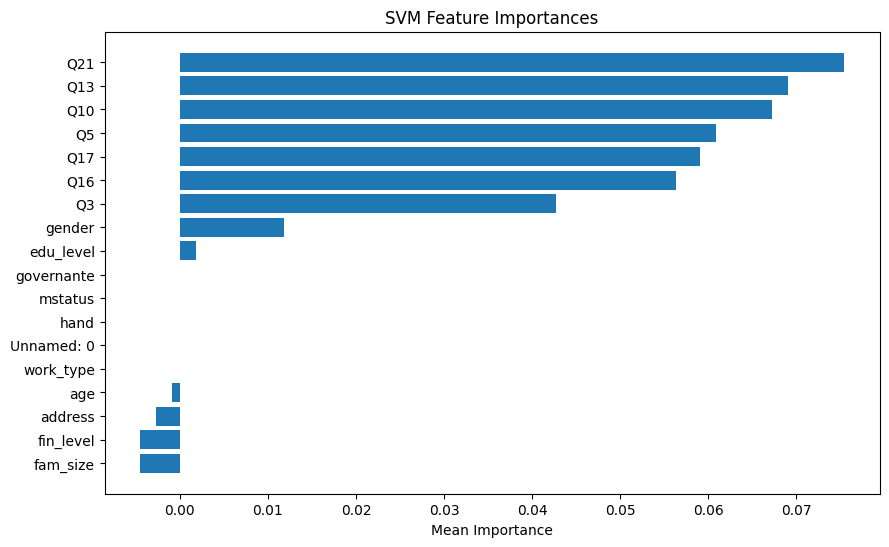

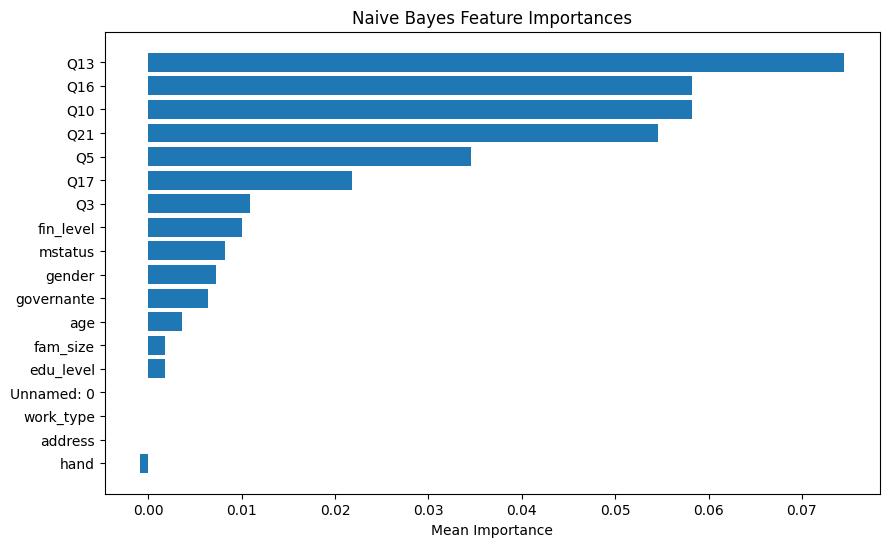

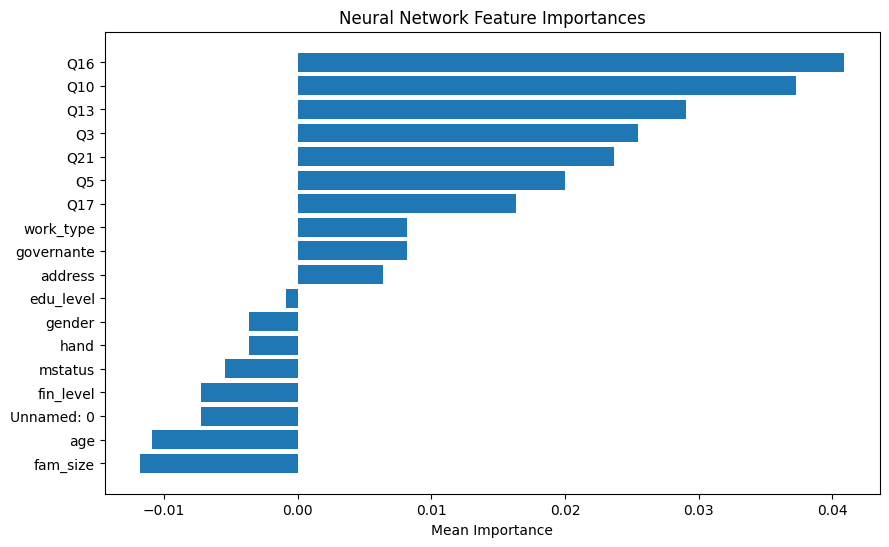

In [352]:
perm_importance_svm = permutation_importance(
    svm_model, test_features, test_target, n_repeats=10, random_state=42
)
perm_importance_nb = permutation_importance(
    nb_model, test_features, test_target, n_repeats=10, random_state=42
)
perm_importance_nn = permutation_importance(
    nn_model, test_features, test_target, n_repeats=10, random_state=42
)

# Plotting Feature Importances
features = data.drop(columns=["Depression_label"]).columns


def plot_importances(importances, model_name, feature_names):
    sorted_idx = importances.importances_mean.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(
        np.array(feature_names)[sorted_idx],
        importances.importances_mean[sorted_idx],
        align="center",
    )
    plt.xlabel("Mean Importance")
    plt.title(f"{model_name} Feature Importances")
    plt.show()


# Plot feature importances for each model
plot_importances(perm_importance_svm, "SVM", features)
plot_importances(perm_importance_nb, "Naive Bayes", features)
plot_importances(perm_importance_nn, "Neural Network", features)

#### Comparing the Algorithms

Models and Accuracies:
Model: SVM, Accuracy: 0.9636
Model: Naive Bayes, Accuracy: 0.8636
Model: Neural Network, Accuracy: 0.9000



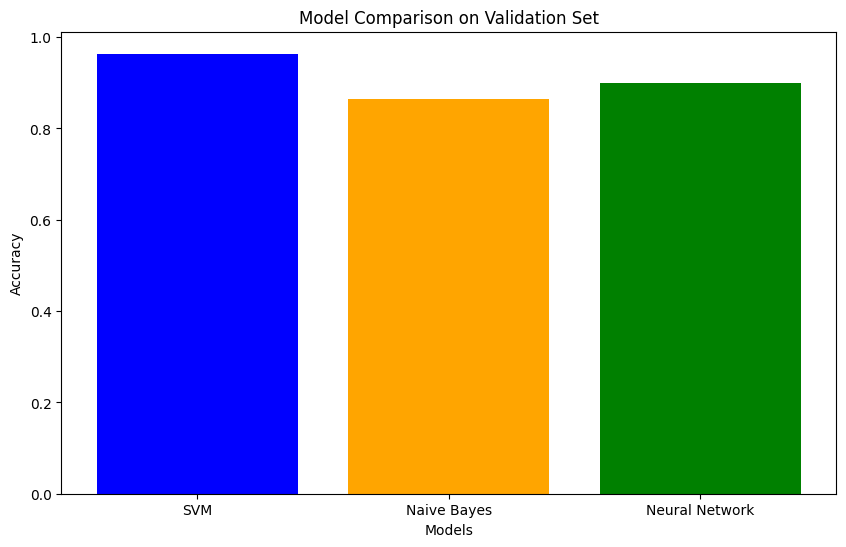

In [353]:

models = ["SVM", "Naive Bayes", "Neural Network"]
accuracies = [
    accuracy_score(test_target, y_pred_svm),
    accuracy_score(test_target, y_pred_nb),
    accuracy_score(test_target, y_pred_nn),
]

print("Models and Accuracies:")
for model, accuracy in zip(models, accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.4f}")

print()

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["Blue", "Orange", "Green"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Validation Set")
plt.show()

Applied the validation data on each model

In [354]:
# Using Best Naive Bayes Model
predicted = nb_model.predict(valid_features)
print(classification_report(valid_target, predicted))

# Using Best SVM Model
predicted = svm_model.predict(valid_features)
print(classification_report(valid_target, predicted))

# Using Best ANN Model
predicted = nn_model.predict(valid_features)
print(classification_report(valid_target, predicted))

              precision    recall  f1-score   support

           1       1.00      0.84      0.91        85
           2       0.48      0.93      0.64        15
           3       0.78      0.88      0.82         8
           4       0.00      0.00      0.00         1

    accuracy                           0.84       109
   macro avg       0.57      0.66      0.59       109
weighted avg       0.90      0.84      0.86       109

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        15
           3       0.89      1.00      0.94         8
           4       0.00      0.00      0.00         1

    accuracy                           0.99       109
   macro avg       0.72      0.75      0.74       109
weighted avg       0.98      0.99      0.99       109

              precision    recall  f1-score   support

           1       0.99      0.96      0.98        85
           2       0.

c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Palestine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#### Visualizing the Pie Chart of the Data

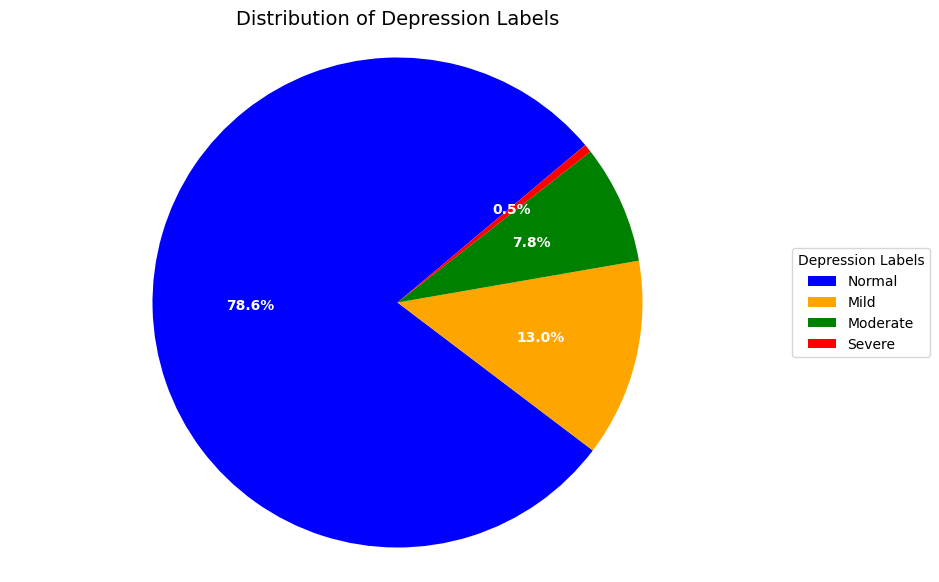

In [355]:
label_counts = data["Depression_label"].value_counts()

# Map the labels to their string names for the pie chart
label_names = {1: "Normal", 2: "Mild", 3: "Moderate", 4: "Severe"}
labels = [label_names[key + 1] for key in label_counts.index]

# Plot the pie chart
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    label_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=40,
    colors=["blue", "orange", "green", "red"],
    textprops=dict(color="w"),
)

# Add a legend
plt.legend(
    wedges,
    labels,
    title="Depression Labels",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

# Improve the layout
plt.setp(autotexts, size=10, weight="bold")
plt.title("Distribution of Depression Labels", fontsize=14)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [356]:
# Classification report
class_report = classification_report(
    test_target,
    y_pred_nn,
    target_names=["Normal", "Mild", "Moderate", "Severe"],
    output_dict=True,
)

# Calculate metrics for each class
metrics = {}
for i, label in enumerate(["Normal", "Mild", "Moderate", "Severe"]):
    metrics[label] = {
        "precision": class_report[label]["precision"],
        "recall": class_report[label]["recall"],
        "fscore": class_report[label]["f1-score"],
        "accuracy": accuracy_score(test_target == i + 1, y_pred_nn == i + 1),
    }

# Print the metrics in a tabular format
print("-----------------------------------------------------------------")
print("\t " "  Normal \t Mild \t    Moderate \t Severe")
print("-----------------------------------------------------------------")
print(
    "Accuracy: "
    + "  "
    + str("%.4f" % metrics["Normal"]["accuracy"])
    + " \t "
    + str("%.4f" % metrics["Mild"]["accuracy"])
    + " \t "
    + str("%.4f" % metrics["Moderate"]["accuracy"])
    + " \t "
    + str("%.4f" % metrics["Severe"]["accuracy"])
    + "\n"
)
print(
    "Precision: "
    + " "
    + str("%.4f" % metrics["Normal"]["precision"])
    + " \t "
    + str("%.4f" % metrics["Mild"]["precision"])
    + " \t "
    + str("%.4f" % metrics["Moderate"]["precision"])
    + " \t "
    + str("%.4f" % metrics["Severe"]["precision"])
    + "\n"
)
print(
    "Recall: "
    + "    "
    + str("%.4f" % metrics["Normal"]["recall"])
    + " \t "
    + str("%.4f" % metrics["Mild"]["recall"])
    + " \t "
    + str("%.4f" % metrics["Moderate"]["recall"])
    + " \t "
    + str("%.4f" % metrics["Severe"]["recall"])
    + "\n"
)
print(
    "F-score: "
    + "   "
    + str("%.4f" % metrics["Normal"]["fscore"])
    + " \t "
    + str("%.4f" % metrics["Mild"]["fscore"])
    + " \t "
    + str("%.4f" % metrics["Moderate"]["fscore"])
    + " \t "
    + str("%.4f" % metrics["Severe"]["fscore"])
)
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
	   Normal 	 Mild 	    Moderate 	 Severe
-----------------------------------------------------------------
Accuracy:   0.9727 	 0.9273 	 0.9273 	 0.9727

Precision:  0.9775 	 0.6364 	 0.5556 	 0.0000

Recall:     0.9886 	 0.6364 	 0.5556 	 0.0000

F-score:    0.9831 	 0.6364 	 0.5556 	 0.0000
-----------------------------------------------------------------


### Conclusion

In this notebook, we successfully analyzed a depression dataset, covering:

1. Data Preprocessing:

- Loaded and cleaned the data, converting categorical labels to numerical values.
- Checked for missing values and visualized feature distributions.
2. Exploratory Data Analysis:

- Plotted the distribution of depression categories and examined the correlation matrix.
- Conducted outlier analysis to identify anomalies.
3. Model Building and Evaluation:

- Built and assessed three models: SVM, Naive Bayes, and ANN.
- Evaluated models using confusion matrices and classification reports.
- ANN emerged as the best-performing model.
4. Visualizations:

- Used charts and graphs to present data distributions and model results clearly.